In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns


import tensorflow as tf

dataset = pd.read_csv('Dataset.csv')
#print (dataset)

In [64]:
train_DS, test_DS = train_test_split(dataset, test_size=0.2)

In [65]:
train_DS.shape

(200000, 33)

In [66]:
test_DS.shape

(50000, 33)

In [67]:
print(train_DS.columns.values,'\n')
print(test_DS.columns.values)

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt' 'Weight' 'Label'] 

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_j

In [68]:
len(train_DS.columns)

33

In [69]:
train_DS = train_DS.drop(['Weight'], axis=1)

b    131533
s     68467
Name: Label, dtype: int64


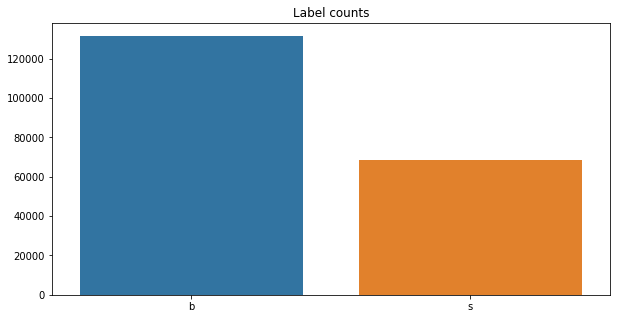

In [71]:
print(train_DS['Label'].value_counts())

rcParams['figure.figsize'] = 10,5
sb.barplot(x = train_DS['Label'].value_counts().index, y = train_DS['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

In [73]:
# getting dummy variables column

enc = LabelEncoder()

train_DS['Label'] = enc.fit_transform(train_DS['Label'])
train_DS.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
232400,332400,137.220,52.584,65.231,92.046,-999.000,-999.000,-999.000,2.095,1.385,...,198.699,1,93.064,1.229,1.888,-999.000,-999.000,-999.000,93.064,1
127609,227609,158.531,90.499,93.286,14.450,-999.000,-999.000,-999.000,3.039,14.450,...,240.171,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
32008,132008,110.697,18.466,78.749,10.343,-999.000,-999.000,-999.000,2.816,10.343,...,169.557,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1
97687,197687,132.292,84.920,103.102,37.096,-999.000,-999.000,-999.000,2.594,4.488,...,143.920,1,36.519,2.208,-2.058,-999.000,-999.000,-999.000,36.519,0
246533,346533,110.849,38.740,83.142,30.986,5.277,444.749,-6.767,2.715,30.777,...,295.456,2,31.629,-3.080,-2.477,31.603,2.197,0.615,63.232,1


In [75]:
y = train_DS["Label"]
X = train_DS
X_test = test_DS

In [76]:
X.set_index(['EventId'],inplace = True)
X_test.set_index(['EventId'],inplace = True)
X = X.drop(['Label'], axis=1)

X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
332400,137.220,52.584,65.231,92.046,-999.000,-999.000,-999.000,2.095,1.385,169.012,...,-1.101,198.699,1,93.064,1.229,1.888,-999.000,-999.000,-999.000,93.064
227609,158.531,90.499,93.286,14.450,-999.000,-999.000,-999.000,3.039,14.450,91.749,...,2.477,240.171,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
132008,110.697,18.466,78.749,10.343,-999.000,-999.000,-999.000,2.816,10.343,76.892,...,2.377,169.557,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
197687,132.292,84.920,103.102,37.096,-999.000,-999.000,-999.000,2.594,4.488,134.491,...,0.264,143.920,1,36.519,2.208,-2.058,-999.000,-999.000,-999.000,36.519
346533,110.849,38.740,83.142,30.986,5.277,444.749,-6.767,2.715,30.777,154.343,...,-2.137,295.456,2,31.629,-3.080,-2.477,31.603,2.197,0.615,63.232


In [77]:
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
EventId,,,,,,,,,,,,,,,,,,,,,
338974,121.343,60.431,95.549,54.552,-999.000,-999.00,-999.000,3.335,3.120,141.793,...,1,51.439,-0.205,1.022,-999.000,-999.000,-999.00,51.439,2.552535,b
184459,-999.000,63.334,81.341,38.975,6.881,1302.23,-11.186,2.612,44.629,168.240,...,2,43.966,-2.634,1.428,39.582,4.247,-0.59,83.547,0.001503,s
218432,127.044,71.235,58.462,150.639,-999.000,-999.00,-999.000,1.480,5.947,238.376,...,1,152.004,-1.445,1.366,-999.000,-999.000,-999.00,152.004,0.018636,s
246451,107.634,27.379,73.460,1.983,-999.000,-999.00,-999.000,3.216,1.983,65.029,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000,0.018636,s
101183,89.883,29.520,56.704,104.292,-999.000,-999.00,-999.000,1.651,45.862,151.182,...,1,71.709,2.334,3.011,-999.000,-999.000,-999.00,71.709,0.018636,s


In [79]:
X_test = X_test.drop(['Weight','Label'],axis = 1)

In [80]:
#Normalizing

from sklearn.preprocessing import normalize

X = normalize(X)
X_test = normalize(X_test)

In [83]:
#K Fold Cross Validation

from sklearn.model_selection import KFold

X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=5, random_state=2020, shuffle=True)

for train_index, val_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

TRAIN: [     0      1      2 ... 199996 199997 199998] TEST: [     4     11     16 ... 199974 199982 199999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     3      7     12 ... 199990 199992 199996]
TRAIN: [     1      3      4 ... 199996 199997 199999] TEST: [     0      2      5 ... 199988 199994 199998]
TRAIN: [     0      2      3 ... 199996 199998 199999] TEST: [     1     13     14 ... 199991 199993 199997]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     6      9     20 ... 199979 199989 199995]


In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(160000, 30)
(160000,)
(40000, 30)
(40000,)


In [86]:
#reshape for rnn

X_train = X_train.reshape(-1, 1, 30)
X_val  = X_val.reshape(-1, 1, 30)
#y_train = y_train.values #convert pd to array
y_train = y_train.reshape(-1, 1,)
#y_val = y_val.values #convert pd to array
y_val = y_val.reshape(-1, 1,)

In [99]:
from tensorflow.keras.layers import Conv2D,LSTM,LeakyReLU, MaxPooling2D,Concatenate,Input, Dropout, Flatten, Dense, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model


  # create model
    

#input 
input_layer = Input(shape=(1,30))
main_rnn_layer = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(input_layer)

    
#output
rnn = LSTM(32)(main_rnn_layer)
dense = Dense(128)(rnn)
dropout_c = Dropout(0.3)(dense)
classes = Dense(1, activation='relu')(dropout_c)

model = Model(input_layer, classes)



In [110]:
# Compile model
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer="adam")


model.summary()
# Fit the model
history = model.fit(X_train, y_train, 
          epochs = 250, 
          batch_size = 16, 
          validation_data=(X_val,  y_val), 
          callbacks=callbacks)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1, 30)]           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 64)             24320     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 41,089
Trainable params: 41,089
Non-trainable params: 0
_______________________________________________________

Epoch 51/250
160000/160000 [==============================] - 36s 225us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 52/250
160000/160000 [==============================] - 36s 226us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 53/250
160000/160000 [==============================] - 36s 225us/sample - loss: 0.0563 - val_loss: 0.0583
Epoch 54/250
159856/160000 [============================>.] - ETA: 0s - loss: 0.0563
Epoch 00054: ReduceLROnPlateau reducing learning rate to 6.046617636457085e-06.
160000/160000 [==============================] - 35s 220us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 55/250
160000/160000 [==============================] - 35s 217us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 56/250
160000/160000 [==============================] - 35s 217us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 57/250
160000/160000 [==============================] - 35s 220us/sample - loss: 0.0563 - val_loss: 0.0582
Epoch 58/250
159872/160000 [============================>

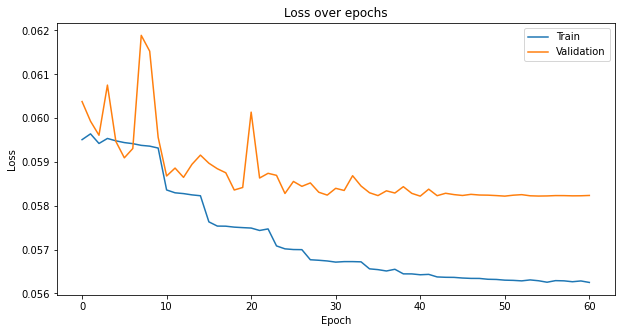

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [112]:
model.load_weights("best_model.h5")

test = X_test #convert pd to array
test = test.reshape(-1, 1,30)


predictions = model.predict(test)

AttributeError: 'str' object has no attribute 'decode'

In [92]:
tf.__version__

'1.14.0'

In [24]:
x= dataset.iloc[:,:-1].values

In [25]:
y= dataset.iloc[:,32].values  

In [26]:
y

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [27]:
x

array([[ 1.00000000e+05,  1.38470000e+02,  5.16550000e+01, ...,
        -2.47500000e+00,  1.13497000e+02,  2.65331134e-03],
       [ 1.00001000e+05,  1.60937000e+02,  6.87680000e+01, ...,
        -9.99000000e+02,  4.62260000e+01,  2.23358449e+00],
       [ 1.00002000e+05, -9.99000000e+02,  1.62172000e+02, ...,
        -9.99000000e+02,  4.42510000e+01,  2.34738894e+00],
       ...,
       [ 3.49997000e+05,  1.05457000e+02,  6.05260000e+01, ...,
        -9.99000000e+02,  4.19920000e+01,  1.86361167e-02],
       [ 3.49998000e+05,  9.49510000e+01,  1.93620000e+01, ...,
        -9.99000000e+02,  0.00000000e+00,  1.68161144e+00],
       [ 3.49999000e+05, -9.99000000e+02,  7.27560000e+01, ...,
        -9.99000000e+02,  0.00000000e+00,  1.87747381e+00]])

In [30]:
dataset.replace(-999, 0)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,...,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226,2.233584,b
2,100002,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,...,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,...,0,0.000,0.000,0.000,0.000,0.00,0.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,...,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,0.000,71.989,36.548,5.042,0.00,0.000,0.000,1.392,5.042,...,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,4.505083,b
249996,349996,0.000,58.179,68.083,22.439,0.00,0.000,0.000,2.585,22.439,...,0,0.000,0.000,0.000,0.000,0.00,0.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,0.00,0.000,0.000,2.390,22.183,...,1,41.992,1.800,-0.166,0.000,0.00,0.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,0.00,0.000,0.000,3.365,13.504,...,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.681611,b


In [31]:
dataset.fillna(dataset.mean())

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [12]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values ='NaN', strategy='mean')  
#Fitting imputer object to the independent variables x.   
imputerimputer= imputer.fit(x[:, 1:32])  
#Replacing missing data with the calculated mean value  
x[:, 1:32]= imputer.transform(x[:, 1:32])  

In [13]:
x

array([[ 1.00000000e+05,  1.38470000e+02,  5.16550000e+01, ...,
        -2.47500000e+00,  1.13497000e+02,  2.65331134e-03],
       [ 1.00001000e+05,  1.60937000e+02,  6.87680000e+01, ...,
        -1.58228913e-03,  4.62260000e+01,  2.23358449e+00],
       [ 1.00002000e+05,  1.21858528e+02,  1.62172000e+02, ...,
        -1.58228913e-03,  4.42510000e+01,  2.34738894e+00],
       ...,
       [ 3.49997000e+05,  1.05457000e+02,  6.05260000e+01, ...,
        -1.58228913e-03,  4.19920000e+01,  1.86361167e-02],
       [ 3.49998000e+05,  9.49510000e+01,  1.93620000e+01, ...,
        -1.58228913e-03,  0.00000000e+00,  1.68161144e+00],
       [ 3.49999000e+05,  1.21858528e+02,  7.27560000e+01, ...,
        -1.58228913e-03,  0.00000000e+00,  1.87747381e+00]])